Soal : 
Mengubah gambar menjadi grayscale untuk kemudian melanjutkan dengan clipping dan menormalisasi sebelum akhirnya menampilkan histogramnya.

3 line dibawah merupakan 3 baris kode python yang mengimpor 3 library berbeda yaitu: numpy merupakan sebuah library untuk komputasi numerik dalam Python, digunakan untuk operasi array dan matriks yang efisien. matplotlib.pyplot merupakan sebuah library untuk visualisasi data dalam bentuk plot, histogram, dan diagram lainnya. cv2 merupakan Sebuah library untuk pemrosesan gambar dan video, biasanya digunakan untuk membaca, menulis, dan memanipulasi citra.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mping
import cv2 as cv

line dibawah ini merupakan inisialisasi sebuah variabel untuk menampilkan gambar menggunakan plt.imread yang digunakan untuk membaca sebuah file gambar dari suatu lokasi tertentu setelah citra dinisialisasi untuk menanmpilkan gambar digunakan plt.imshow untuk menampilkan citra pada program seperti pada output yang ditampilkan setelah code dibawah ini.

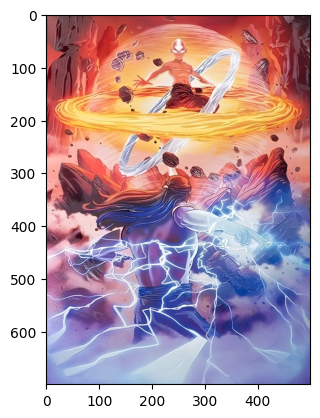

In [119]:
img = mping.imread ("images/aang.jpg")

plt.imshow (img)
plt.show ()

Script di bawah ini berisi fungsi yang digunakan untuk mengubah citra berwarna ke dalam grayscale. grayscale(image) dilakukan dengan memberikan citra berwarna sebagai argumennya, fungsi tersebut akan mengembalikan citra yang telah diubah ke dalam citra grayscale.

In [120]:
def grayscale(image):
    gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    return gray_image

Script di bawah ini digunakan untuk membaca sebuah gambar berwarna menggunakan OpenCV (cv.imread()) dan kemudian mengubahnya menjadi citra grayscale menggunakan fungsi grayscale() yang telah didefinisikan di atas.

In [121]:
color_img = cv.imread('images/aang.jpg')
gray_img = grayscale(color_img)

Script di bawah ini digunakan untuk menampilkan citra grayscale menggunakan library Matplotlib.

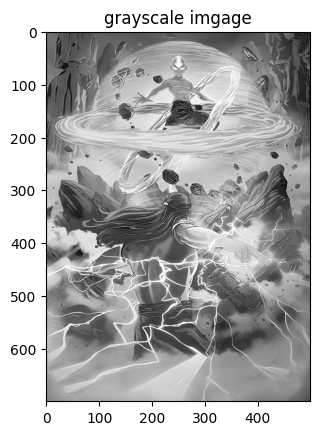

In [122]:
plt.imshow(gray_img, cmap='gray')
plt.title('grayscale imgage')
plt.show()

Melakukan clipping pada gambar grayscale untuk memastikan bahwa semua nilai piksel berada dalam rentang yang diinginkan, dan kemudian mencetak matriks pixel yang telah diproses.

In [123]:
Clip_img = np.clip(gray_img, 0, 256)
print("\nMatriks elemen pixel setelah clipping:")
for row in Clip_img:
    print(row)


Matriks elemen pixel setelah clipping:
[169 123 135 133 131 127 124 118 117 115 114 113 112 112 111 110 111 111
 113 114 112 113 113 112 112 106 106 108 105 104 105 102  95 109 105  96
 104 101 102  98  96  97 100  98  96  89  79  83 106 104  93  83  94  99
  91  99 109  95  90  98 101  90  91  99  98  95  92  97  94  90  91  93
  92  94  94  94  92  92  93  93  95  95  98 100 107 111 109 110 110 106
 107 108 105 107 110 108 108 108 107 107 106 106 106 106 107 106 105 105
 104 104 103 103 102 102 101 100 100 100 101 101  99  99  99  99  99  99
  99  99  99  99  99  98  98  97  97  97  96  96  97  97  97  96  95  95
  97  96  96  94  93  92  92  92  91  90  89  89  88  89  90  90  92  92
  92  92  92  92  92  93  92  93  94  94  95  95  95  95  97  97  98  99
  99  99  99  98  98  98  98  98 100 102 103 103 102 101 101 102 103 104
 104 104 105 105 105 105 105 105 105 105 105 106 106 106 106 105 105 105
 107 104 107 106 105 105 100 104 105 104 102 100 100 102 103 102 100  99
 103 104 10

Script di bawah ini melakukan proses penghitungan histogram dari gambar yang telah diproses dengan clipping, kemudian melakukan normalisasi untuk mendapatkan distribusi probabilitas piksel yang merata, dan akhirnya menghitung histogram kumulatif.

In [124]:
hist, _ = np.histogram(Clip_img.flatten(), bins=256, range=(0, 255))
sum_hist = np.sum(hist)
normalized_hist = hist / sum_hist  # Normalisasi histogram
cumulative_hist = np.cumsum(normalized_hist)

Script di bawah ini menghitung indeks untuk nilai grayscale. Menggunakan fungsi np.arange(256) ini menghasilkan numpy yang berisi urutan angka dari 0 hingga 255.

In [125]:
grayIndex = np.arange(256)

Menampilkan histogram setelah melakukan proses clipping dan normalisasi, dengan menampilkan intensitas piksel pada sumbu x dan probabilitasnya pada sumbu y. Pada script dibawah ini terdapat pltylim() yang digunakan untuk menentukan batas atas dan bawah dari sumbu y pada plot. Dalam kasus ini, batas y diatur dari 0 hingga 0.01 untuk memperjelas visualisasi histogram yang dinormalisasi. 

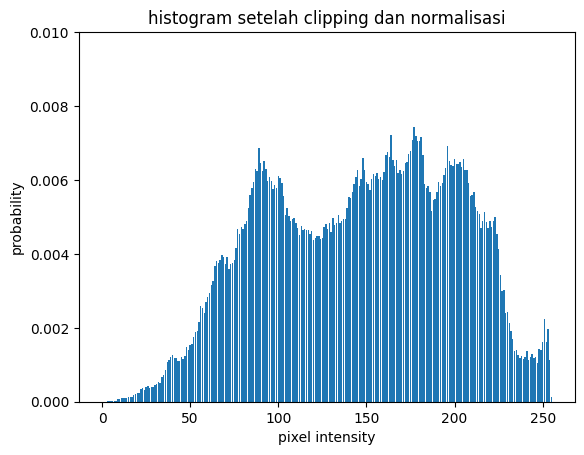

In [126]:
plt.bar(np.arange(256), normalized_hist)
plt.ylim(0, 0.01)
plt.title('histogram setelah clipping dan normalisasi')
plt.xlabel('pixel intensity')
plt.ylabel('probability')
plt.show()

Soal : mengetahui Jumlah intensitas setiap indeks dan gambar sebelum histogramnya ditampilkan.

Script di bawah ini berisi fungsi yang digunakan untuk menghitunng histogram dari grayscale yang diberikan sebagai input. Setelah fungsi getShape(img) dieksekusi dengan memberikan citra grayscale sebagai argumennya, fungsi tersebut akan mengembalikan histogram citra grayscale tersebut dalam bentuk array. 

In [127]:
def getShape(img):
    gray_img = grayscale(img)
    
    img_height = gray_img.shape  [0]
    img_width =  gray_img.shape  [1]
    print(img_height,img_width)
    histogram = np.zeros(256).astype(int)

    for x in range (0,img_height):
       
        for y in range (0,img_width):
           
            histogram[gray_img[x,y]] += 1
           
    return histogram

Script di bawah ini digunakan untuk menampilkan detail histogram dari citra grayscale yang diberikan sebagai input. Setelah showDetail(img) dieksekusi dengan memberikan citra grayscale sebagai argumennya, fungsi tersebut akan mencetak detail histogram citra grayscale tersebut ke dalam output.Dan ketika memanggil showDetail(img), akan terlihat output yang mencakup detail histogram dari citra grayscale img yang diberikan sebagai input.

In [128]:
def showDetail(img):
    list = getShape(img)
    for i in range (0,len(list)):
        print("Histogram [",i,"] : ", list[i])
showDetail(img)

700 500
Histogram [ 0 ] :  0
Histogram [ 1 ] :  0
Histogram [ 2 ] :  0
Histogram [ 3 ] :  11
Histogram [ 4 ] :  22
Histogram [ 5 ] :  29
Histogram [ 6 ] :  59
Histogram [ 7 ] :  76
Histogram [ 8 ] :  59
Histogram [ 9 ] :  73
Histogram [ 10 ] :  68
Histogram [ 11 ] :  73
Histogram [ 12 ] :  92
Histogram [ 13 ] :  77
Histogram [ 14 ] :  110
Histogram [ 15 ] :  103
Histogram [ 16 ] :  159
Histogram [ 17 ] :  127
Histogram [ 18 ] :  130
Histogram [ 19 ] :  162
Histogram [ 20 ] :  171
Histogram [ 21 ] :  163
Histogram [ 22 ] :  157
Histogram [ 23 ] :  147
Histogram [ 24 ] :  146
Histogram [ 25 ] :  150
Histogram [ 26 ] :  143
Histogram [ 27 ] :  168
Histogram [ 28 ] :  191
Histogram [ 29 ] :  249
Histogram [ 30 ] :  348
Histogram [ 31 ] :  362
Histogram [ 32 ] :  401
Histogram [ 33 ] :  412
Histogram [ 34 ] :  360
Histogram [ 35 ] :  375
Histogram [ 36 ] :  389
Histogram [ 37 ] :  400
Histogram [ 38 ] :  396
Histogram [ 39 ] :  406
Histogram [ 40 ] :  484
Histogram [ 41 ] :  430
Histogram [

Soal : Normalisasi dengan menerapkan konvolusi menggunakan kernel yang disediakan dengan zero padding.